In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import hvplot.pandas
import time
from scipy.stats import linregress

In [101]:
#locating files
ams_weekday_csv = "Resources/amsterdam_weekdays.csv"
ams_weekend_csv = "Resources/amsterdam_weekends.csv"
lond_weekday_csv = "Resources/london_weekdays.csv"
lond_weekend_csv = "Resources/london_weekends.csv"
paris_weekday_csv = "Resources/paris_weekdays.csv"
paris_weekend_csv = "Resources/paris_weekends.csv"


In [102]:
#make files readable
ams_weekday_df = pd.read_csv(ams_weekday_csv)
ams_weekend_df = pd.read_csv(ams_weekend_csv)
lond_weekday_df = pd.read_csv(lond_weekday_csv)
lond_weekend_df = pd.read_csv(lond_weekend_csv)
paris_weekday_df = pd.read_csv(paris_weekday_csv)
paris_weekend_df = pd.read_csv(paris_weekend_csv)


In [103]:
#added column to each file to indicate if weekend or weekday line item
ams_weekday_df['Weekday or Weekend'] = 'Weekday'
ams_weekday_df['City'] = 'Amsterdam'
ams_weekend_df['Weekday or Weekend']= 'Weekend'
ams_weekend_df['City'] = 'Amsterdam'
lond_weekday_df['Weekday or Weekend'] = 'Weekday'
lond_weekday_df['City'] = 'London'
lond_weekend_df['Weekday or Weekend'] = 'Weekend'
lond_weekend_df['City'] = 'London'
paris_weekday_df['Weekday or Weekend'] = 'Weekday'
paris_weekday_df['City'] = 'Paris'
paris_weekend_df['Weekday or Weekend'] ='Weekend'
paris_weekend_df['City'] = 'Paris'

In [104]:
#stack files
complete_data_df = pd.concat([ams_weekday_df,ams_weekend_df,lond_weekday_df,lond_weekend_df,paris_weekday_df,paris_weekend_df], ignore_index=True)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,...,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,...,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,...,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,...,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400,Weekend,Paris


In [105]:
#list column names
complete_data_df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Weekday or Weekend', 'City'],
      dtype='object')

In [106]:
# drop some columns for easier processing
complete_data_df = complete_data_df.drop('attr_index',axis=1)
complete_data_df = complete_data_df.drop('attr_index_norm',axis=1)
complete_data_df = complete_data_df.drop('rest_index_norm',axis=1)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,rest_index,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,98.253896,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,837.280757,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,95.386955,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,875.033098,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,815.305740,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,540.326583,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,474.351813,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,406.585935,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,602.451672,2.38200,48.87400,Weekend,Paris


In [107]:
complete_data_df = complete_data_df.drop('rest_index',axis=1)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,2.38200,48.87400,Weekend,Paris


In [108]:
#split data into 3 different sets
amsterdam_data = complete_data_df[complete_data_df['City'] == 'Amsterdam']
london_data = complete_data_df[complete_data_df['City'] == 'London']
paris_data = complete_data_df[complete_data_df['City'] == 'Paris']

The average price per night in Amsterdam is around 573.11.
The average distance to the city center is about 2.825 km.
The median distance to the city center is about 2.330 km.


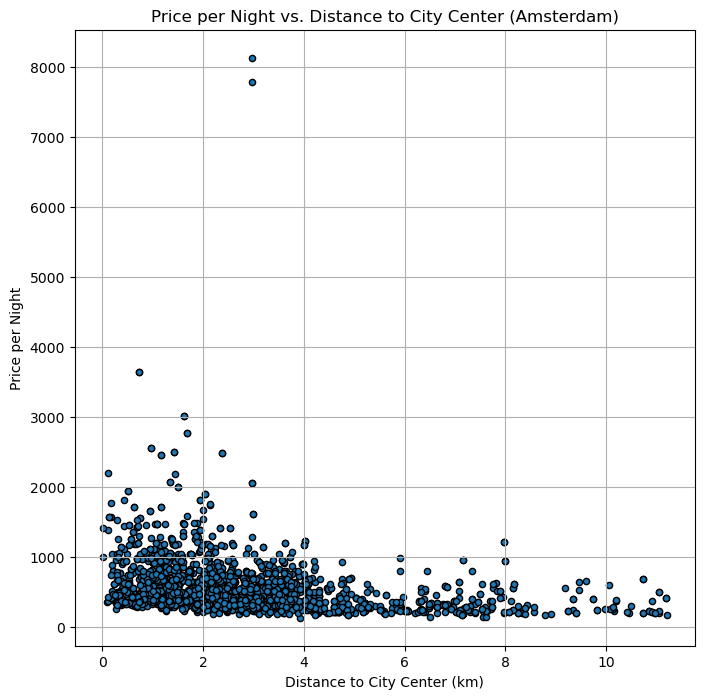

In [109]:
# how does distance to city center correlate with price (for each city then compare between the two) - amsterdam
amsterdam_data.plot(kind='scatter', x='dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to City Center (Amsterdam)")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price per Night")

avg_dam_price = amsterdam_data['realSum'].mean()
avg_dam_dist = amsterdam_data['dist'].mean()
med_dam_dist = amsterdam_data['dist'].median()
print(f"The average price per night in Amsterdam is around {avg_dam_price:.2f}.")
print(f"The average distance to the city center is about {avg_dam_dist:.3f} km.")
print(f"The median distance to the city center is about {med_dam_dist:.3f} km.")

# Show plot
plt.show()


In [110]:
# Configure the map plot
dam_citymap = amsterdam_data.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    size = "person_capacity",
    scale = 1.5,
    color = "room_type",
    alpha= 0.4,
    hover_cols = ["room_type", "realSum", 'dist']
)

# Display the map plot
dam_citymap
plt.savefig("amsterdam_data_Fig1.png")

<Figure size 640x480 with 0 Axes>

The average price per night in London is around 362.47.
The average distance to the city center is about 5.326 km.
The median distance to the city center is about 4.924 km.


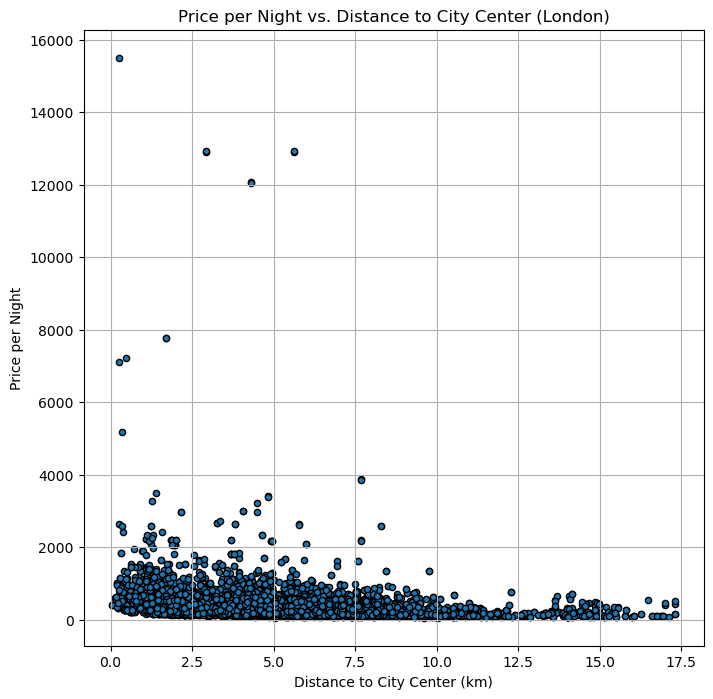

In [111]:
# how does distance to city center correlate with price (for each city then compare between the two) - paris
london_data.plot(kind='scatter', x='dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to City Center (London)")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price per Night")

avg_london_price = london_data['realSum'].mean()
avg_london_dist = london_data['dist'].mean()
med_london_dist = london_data['dist'].median()
print(f"The average price per night in London is around {avg_london_price:.2f}.")
print(f"The average distance to the city center is about {avg_london_dist:.3f} km.")
print(f"The median distance to the city center is about {med_london_dist:.3f} km.")


# Show plot
plt.show()

In [112]:
# Configure the map plot
ldn_citymap = london_data.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    size = "person_capacity",
    scale = 1.5,
    color = "room_type",
    alpha= 0.25,
    hover_cols = ["room_type", "realSum", 'dist']
)

# Display the map plot
ldn_citymap
plt.savefig("london_data_Fig1.png")

<Figure size 640x480 with 0 Axes>

The average price per night in Paris is around 392.53.
The average distance to the city center is about 2.996 km.
The median distance to the city center is about 2.997 km.


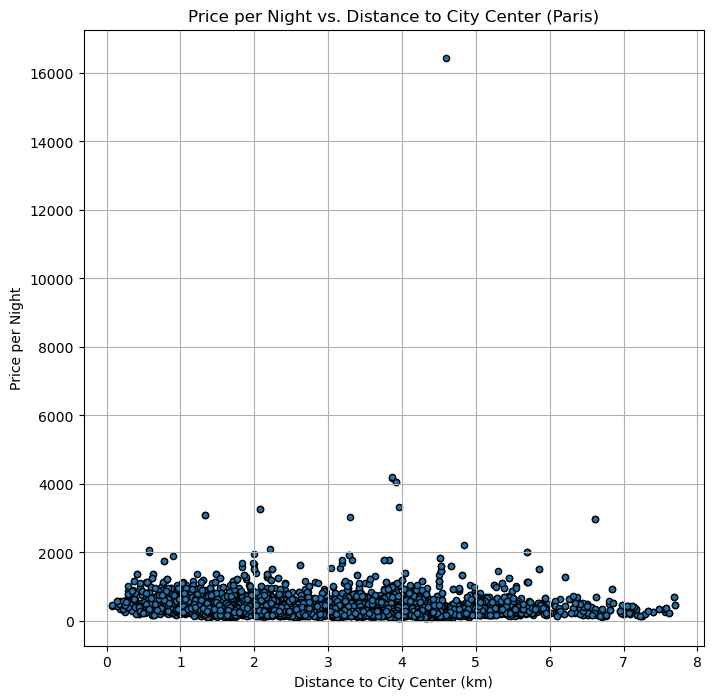

In [113]:
# how does distance to city center correlate with price (for each city then compare between the two) - london
paris_data.plot(kind='scatter', x='dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to City Center (Paris)")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price per Night")

avg_paris_price = paris_data['realSum'].mean()
avg_paris_dist = paris_data['dist'].mean()
med_paris_dist = paris_data['dist'].median()
print(f"The average price per night in Paris is around {avg_paris_price:.2f}.")
print(f"The average distance to the city center is about {avg_paris_dist:.3f} km.")
print(f"The median distance to the city center is about {med_paris_dist:.3f} km.")

# Show plot
plt.show()

In [114]:
# Configure the map plot
par_citymap = paris_data.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    size = "person_capacity",
    scale = 1.5,
    color = "room_type",
    alpha= 0.25,
    hover_cols = ["room_type", "realSum", 'dist']
)

# Display the map plot
par_citymap
plt.savefig("paris_data_Fig1.png")

<Figure size 640x480 with 0 Axes>

The average price per night in Amsterdam is around 573.11.
The average distance to the nearest metro is about 1.089 km.
The median distance to the nearest metro is about 0.862 km.


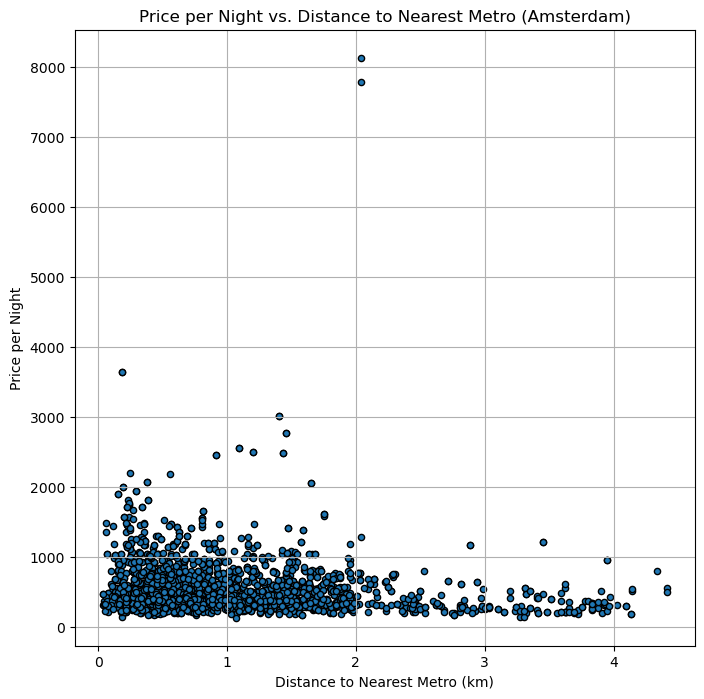

In [115]:
# how does distance to nearest metro correlate with price (for each city then compare between the two) - amsterdam
amsterdam_data.plot(kind='scatter', x='metro_dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to Nearest Metro (Amsterdam)")
plt.xlabel("Distance to Nearest Metro (km)")
plt.ylabel("Price per Night")

avg_dammetro_price = amsterdam_data['realSum'].mean()
avg_dammetro_dist = amsterdam_data['metro_dist'].mean()
med_dammetro_dist = amsterdam_data['metro_dist'].median()
print(f"The average price per night in Amsterdam is around {avg_dammetro_price:.2f}.")
print(f"The average distance to the nearest metro is about {avg_dammetro_dist:.3f} km.")
print(f"The median distance to the nearest metro is about {med_dammetro_dist:.3f} km.")

# Show plot
plt.show()


The average price per night in London is around 362.47.
The average distance to the nearest metro is about 1.006 km.
The median distance to the nearest metro is about 0.531 km.


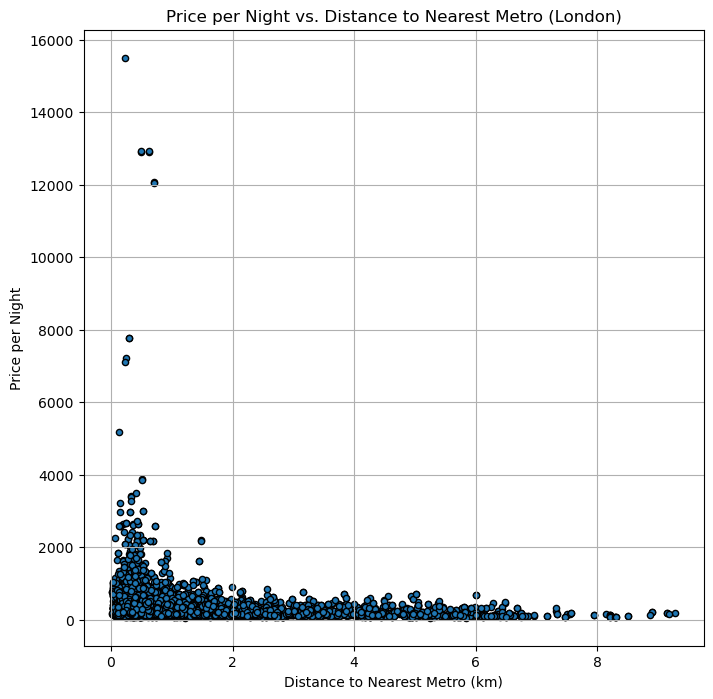

In [116]:
# how does distance to city center correlate with price (for each city then compare between the two) - paris
london_data.plot(kind='scatter', x='metro_dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to Nearest Metro (London)")
plt.xlabel("Distance to Nearest Metro (km)")
plt.ylabel("Price per Night")

avg_ldnmetro_price = london_data['realSum'].mean()
avg_ldnmetro_dist = london_data['metro_dist'].mean()
med_ldnmetro_dist = london_data['metro_dist'].median()
print(f"The average price per night in London is around {avg_ldnmetro_price:.2f}.")
print(f"The average distance to the nearest metro is about {avg_ldnmetro_dist:.3f} km.")
print(f"The median distance to the nearest metro is about {med_ldnmetro_dist:.3f} km.")


# Show plot
plt.show()

The average price per night in Paris is around 392.53.
The average distance to the nearest metro is about 0.227 km.
The median distance to the nearest metro is about 0.207 km.


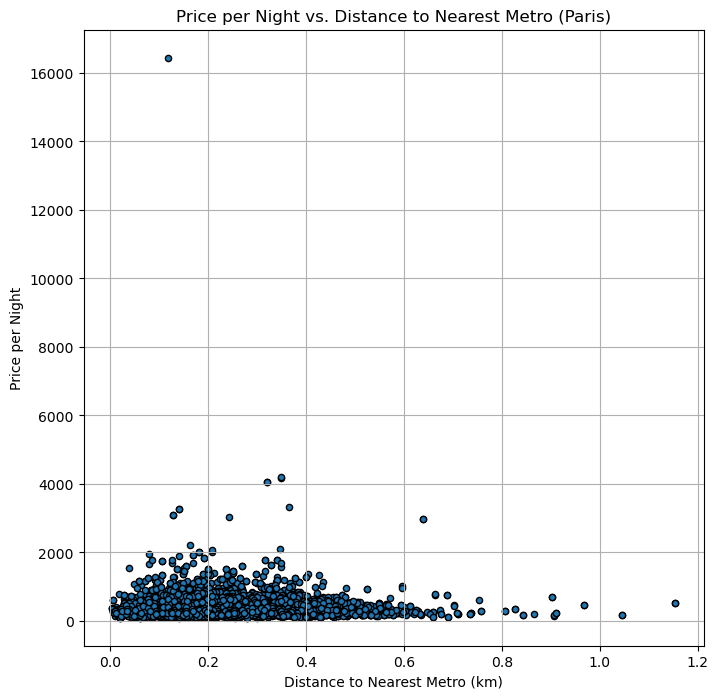

In [117]:
# how does distance to city center correlate with price (for each city then compare between the two) - london
paris_data.plot(kind='scatter', x='metro_dist',y='realSum', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("Price per Night vs. Distance to Nearest Metro (Paris)")
plt.xlabel("Distance to Nearest Metro (km)")
plt.ylabel("Price per Night")

avg_parismetro_price = paris_data['realSum'].mean()
avg_parismetro_dist = paris_data['metro_dist'].mean()
med_parismetro_dist = paris_data['metro_dist'].median()
print(f"The average price per night in Paris is around {avg_parismetro_price:.2f}.")
print(f"The average distance to the nearest metro is about {avg_parismetro_dist:.3f} km.")
print(f"The median distance to the nearest metro is about {med_parismetro_dist:.3f} km.")

# Show plot
plt.show()